# Capstone Project - The Battle of neighborhoods
# Codes used to prepare this Report

# 1. Introduction
An insurance company is trying to launch an office in New York city in one of the Boroughs to make profit at a minimum cost. There are five Borough categories; Bronx, Brooklyn, Manhattan, Queens and Staten Island. The company decided to pick one Borough location out of these five locations. For the insurance company's profitability and set insurance premium for the residents of New York city, and advocate a systems approach to road traffic safety that emphasizes involvement at all levels of the road traffic system, studying motor vehicle collisions statistics from public dataset in each Borough group is important. The dataset contains collisions information on motorists, cyclists, and pedestrians. The company is trying to answer which regions are better or worse in terms of number of injuries and fatalities?  
   
Road traffic accidents are the leading cause of death and injury and the tenth leading cause of all deaths globally. Now make up a surprisingly significant portion of the worldwide burden of ill health. An estimated 1.2 million people are killed in road crashes each year and as many as 50 million are injured. If present trends continue, road traffic injuries are predicted to be the third leading contributor to the global burden of death and injury by 2020. This burden is creating enormous economic hardship due to the loss of family.  
Road traffic injuries are preventable if successful interventions such as seat belt safety laws, enforcement of speed limits, warnings about the dangers of mixing alcohol consumption with driving, and safer design and use of roads and vehicles are considered. More than one-half of all road traffic deaths globally occur among people ages 15 to 44—their most productive earning years. Moreover, the disability burden for this age group accounts for 60 percent of all lost because of road traffic accidents. 
Driver impairment is an important component of road traffic accidents, driving at excess speeds, while under the influence of alcohol or drugs, while sleepy or tired, when visibility is compromised, or without protective gear for all vehicle occupants are major factors in crashes, deaths, and serious injuries.
Prevention interventions include: managing risk exposure to potential road traffic injury, planning and designing roads for safety, setting road and safety rules, securing compliance, and improving transport policy, providing visible, crash worthy, and smart vehicles.

The dataset contains a breakdown of every collision by location and injury. Each record represents a collision in New York city by borough and this data can be used to do in-depth analysis. This would interest any insurance company to open an office in New York city. The dataset considered in this project falls within location data and we considered to create a map to visualize where the vehicle accidents data is placed in New York city and each neighborhood is clustered based on the most common venues. The data is unlabeled and for the analysis of unlabeled data, k-means clustering algorithm is a widely used approach and hence it was modeled by use of k-means clustering which will be described in detail in section 3. 
 


# 2. Data Description
In this section the dataset used in this project is described and the data is a breakdown of every collision in New York city (NYC) by location and injury. This data is manually run every month and reviewed by the TrafficStat Unit before being posted on the website. Each record represents a collision in NYC by city, borough and cross street. This data can be used by the public to see how dangerous/safe intersections are in NYC.    
  
The public dataset about motor vehicle collision was obtained from kaggle website and there are 29 variables
and about 1.4 million records. Each record includes location coordinates and other feature variables, most notably the number of injuries and fatalities, segmented further by motorists, cyclists, and pedestrians. Out of these feature variables some of them important for this particular study are selected. These are Borough, Latitude, Longitude, number of persons injured, number of persons killed, number of pedestrians injured, number of pedestrians killed, number of cyclist injured, number of cyclist killed, number of motorist injured and number of motorist killed. The original dataset is processed, the rows that have any missing values and the duplicate records were removed in order to perform statistical analysis. From missing value investigation, there were a number of variables that have missing value except Date, Time, and ZIP CODE. The variable Borough is used to study which of the Borough group has the highest number of deaths and injuries as compared to the other. The motor vehicle collisions dataset is in .csv format, which can be easily imported into pandas. After the dataset is processed and the missing values were removed and the duplicates deleted, the pandas data frame contains information on 124868 records; from these 43602 Brooklyn, 35364 Queens, 21882 Manhattan, 19231 Bronx and 4789 Staten Island.   
For a Borough that has the lowest number of people killed and injured, a Foursquare location data is used in order to get the most common venues in each neighborhood of given Borough in New York city and then we will use these features to cluster the Borough's in to different cluster groups.     
             
The 29 variables presented in the dataset with their associated descriptions are as follows:   
DATE - Date of accident  
TIME - Time of accident  
BOROUGH - Borough of accident  
ZIP CODE - Zip code of accident  
LATITUDE - Location (Latitude of accident)  
LONGITUDE - Location (Longitude of accident)  
ON STREET NAME - Name of On-street that accident happened  
CROSS STREET NAME - Connecting of street that accident happened  
OFF STREET NAME - Name of Off-street that accident happened  
NUMBER OF PERSONS INJURED - Number of persons injured  
NUMBER OF PERSONS KILLED - Number of persons killed  
NUMBER OF PEDESTRIANS INJURED - Number of pedestrians injury  
NUMBER OF PEDESTRIANS KILLED - Number of pedestrians killed  
NUMBER OF CYCLIST INJURED - Number of cyclist injury  
NUMBER OF CYCLIST KILLED - Number of cyclist killed  
NUMBER OF MOTORIST INJURED - Number of motorist injury  
NUMBER OF MOTORIST KILLED - Number of motorist killed  
CONTRIBUTING FACTOR VEHICLE - Reason of accident  
UNIQUE KEY - Unique key VEHICLE TYPE - Type of vehicle involve in accident  

## Before we get the data and start exploring it, let's download all the libraries that we will need.

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
%matplotlib inline

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
my_file = project.get_file("Motor_Vehicle_Collisions.csv")
my_file.seek(0)
df = pd.read_csv(my_file)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,7/12/2019,0:00,BRONX,10472,40.831623,-73.86726,"(40.831623, -73.86726)",WESTCHESTER AVENUE,SAINT LAWRENCE AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4168556,Sedan,NaN,NaN,NaN,NaN
1,7/12/2019,0:00,BROOKLYN,11207,40.669792,-73.89240,"(40.669792, -73.8924)",SUTTER AVENUE,WYONA STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4169745,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
2,7/12/2019,0:00,BROOKLYN,11234,40.618717,-73.93262,"(40.618717, -73.93262)",NaN,NaN,2098 FLATBUSH AVENUE,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4169938,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,7/12/2019,0:00,NaN,NaN,40.829155,-73.93728,"(40.829155, -73.93728)",8 AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4169906,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,7/12/2019,0:00,NaN,NaN,40.718987,-73.94635,"(40.718987, -73.94635)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4168595,Sedan,Sedan,NaN,NaN,NaN


# Data Manipulation:

In [4]:
# size of dataframe (rows, columns)
df.shape    

(1048575, 29)

### I. Rename columns

In [5]:
df.rename(columns = {'ZIP CODE'          : 'ZIP_CODE',
                       'ON STREET NAME'    : 'STREET_ON',
                       'CROSS STREET NAME' : 'STREET_CROSS',
                       'OFF STREET NAME'   : 'STREET_OFF',
                       'NUMBER OF PERSONS INJURED'     : 'NUM_PER_INJUR',
                       'NUMBER OF PERSONS KILLED'      : 'NUM_PER_KILL',
                       'NUMBER OF PEDESTRIANS INJURED' : 'NUM_PED_INJUR',
                       'NUMBER OF PEDESTRIANS KILLED'  : 'NUM_PED_KILL',
                       'NUMBER OF CYCLIST INJURED'     : 'NUM_CYC_INJUR',
                       'NUMBER OF CYCLIST KILLED'      : 'NUM_CYC_KILL',
                       'NUMBER OF MOTORIST INJURED'    : 'NUM_MOTOR_INJUR',
                       'NUMBER OF MOTORIST KILLED'     : 'NUM_MOTOR_KILL',
                       'CONTRIBUTING FACTOR VEHICLE 1' : 'VEH_FACTOR_1',
                       'CONTRIBUTING FACTOR VEHICLE 2' : 'VEH_FACTOR_2',
                       'CONTRIBUTING FACTOR VEHICLE 3' : 'VEH_FACTOR_3',
                       'CONTRIBUTING FACTOR VEHICLE 4' : 'VEH_FACTOR_4',
                       'CONTRIBUTING FACTOR VEHICLE 5' : 'VEH_FACTOR_5',
                       'UNIQUE KEY' : 'UNIQUE_KEY',
                       'VEHICLE TYPE CODE 1' : 'VEH_TYPE_1',
                       'VEHICLE TYPE CODE 2' : 'VEH_TYPE_2',
                       'VEHICLE TYPE CODE 3' : 'VEH_TYPE_3',
                       'VEHICLE TYPE CODE 4' : 'VEH_TYPE_4',
                       'VEHICLE TYPE CODE 5' : 'VEH_TYPE_5'},
           inplace = True) 

### II. Drop unnecessary columns

In [6]:
df.drop(['ZIP_CODE', 'STREET_ON', 'STREET_CROSS', 'STREET_OFF', 'VEH_FACTOR_1', 'VEH_FACTOR_2', 'VEH_FACTOR_3', 'VEH_FACTOR_4', 'VEH_FACTOR_5', 'UNIQUE_KEY', 'VEH_TYPE_1', 'VEH_TYPE_2', 'VEH_TYPE_3', 'VEH_TYPE_4', 'VEH_TYPE_5'], axis=1, inplace=True)

### III. Delete all rows for which column 'NUM_PER_INJUR' has value 0, NUM_PER_KILL=0, NUM_PED_INJUR=0 , NUM_PED_KILL=0, NUM_CYC_INJUR=0, NUM_CYC_KILL=0, NUM_MOTOR_INJUR=0 and NUM_MOTOR_KILL=0


In [7]:
indexNames = df[ (df['NUM_PER_INJUR'] == 0.0) & (df['NUM_PER_KILL'] == 0.0) & (df['NUM_PED_INJUR'] == 0) & (df['NUM_PED_KILL'] == 0) & (df['NUM_CYC_INJUR'] == 0) & (df['NUM_CYC_KILL'] == 0) & (df['NUM_MOTOR_INJUR'] == 0) & (df['NUM_MOTOR_KILL'] == 0)].index
 
df.drop(indexNames , inplace=True)

### IV. Drop all rows that have any NaN (missing) values


In [8]:
df = df.dropna()
df.tail(2)
df.shape

(125164, 14)

### V. Remove duplicate rows

In [9]:
df = df.drop_duplicates()
df.shape

(124868, 14)

### The number of accidents (counts) by each borough

In [10]:
df.BOROUGH.value_counts()

BROOKLYN         43602
QUEENS           35364
MANHATTAN        21882
BRONX            19231
STATEN ISLAND     4789
Name: BOROUGH, dtype: int64

## Creating variables to perform bar graphs later


In [11]:
# Create variables
## Create year variable to "YEAR"
df['YEAR'] = pd.to_datetime(df['DATE']).dt.year
## Create month variable to "DATE_MTH"
df['DATE_MTH']  = pd.to_datetime(df['DATE']).dt.month

## Create time variable to O'Clock format
df['TIME_O'] = df['TIME'].apply(lambda time: time.split(':')[0])

time_dict = {'0' : 'A 0 O Clock', '1' : 'B 1 O Clock', '2' : 'C 2 O Clock',
             '3' : 'D 3 O Clock', '4' : 'E 4 O Clock', '5' : 'F 5 O Clock',
             '6' : 'G 6 O Clock', '7' : 'H 7 O Clock', '8' : 'I 8 O Clock',
             '9' : 'J 9 O Clock', '10' : 'K 10 O Clock', '11' : 'L 11 O Clock',
             '12' : 'M 12 O Clock', '13' : 'N 13 O Clock', '14' : 'O 14 Clock',
             '15' : 'P 15 O Clock', '16' : 'Q 16 O Clock', '17' : 'R 17 O Clock',
             '18' : 'S 18 O Clock', '19' : 'T 19 O Clock', '20' : 'U 20 O Clock',
             '21' : 'V 21 O Clock', '22' : 'W 22 O Clock', '23' : 'X 23 O Clock' }
        
df['TIME_GRP'] = df['TIME_O'].map({value : key for value, key in time_dict.items()})

In [12]:
# Recheck columns
# df.info()

# Results:

### The total number, the mean and standard deviation of number of pedestrians, motorists and cyclists injured as well as killed by each borough group

In [13]:
df.groupby('BOROUGH', axis=0).agg(['sum', 'mean', 'max', 'std'])[["NUM_PED_INJUR", "NUM_PED_KILL", "NUM_MOTOR_INJUR", "NUM_MOTOR_KILL", "NUM_CYC_INJUR", "NUM_CYC_KILL"]]

NUM_PED_INJUR                         NUM_PED_KILL            \
                        sum      mean max       std          sum      mean   
BOROUGH                                                                      
BRONX                  6193  0.322032   5  0.500891           44  0.002288   
BROOKLYN              12829  0.294230   7  0.485196          123  0.002821   
MANHATTAN              8690  0.397130  27  0.550496           85  0.003884   
QUEENS                 9130  0.258172   6  0.465441          105  0.002969   
STATEN ISLAND          1001  0.209021   6  0.437337           16  0.003341   

                            NUM_MOTOR_INJUR                          \
              max       std             sum      mean max       std   
BOROUGH                                                               
BRONX           2  0.048856           18772  0.976132  20  1.154386   
BROOKLYN        2  0.053896           39448  0.904729  24  1.093864   
MANHATTAN       6  0.072392           12607  0.576136  17  0.887009   
QUEENS          2  0.054927           35209  0.995617  30  1.059472   
STATEN ISLAND   2  0.061223            5436  1.135101  22  1.106636   

              NUM_MOTOR_KILL                         NUM_CYC_INJUR            \
                         sum      mean max       std           sum      mean   
BOROUGH                                                                        
BRONX                     32  0.001664   1  0.040759          1530  0.079559   
BROOKLYN                  59  0.001353   2  0.037988          6158  0.141232   
MANHATTAN                 15  0.000685   1  0.026174          4648  0.212412   
QUEENS                    69  0.001951   3  0.047820          3093  0.087462   
STATEN ISLAND             21  0.004385   1  0.066081           179  0.037377   

                            NUM_CYC_KILL                          
              max       std          sum      mean max       std  
BOROUGH                                                           
BRONX           3  0.274243            7  0.000364   1  0.019076  
BROOKLYN        3  0.350824           25  0.000573   1  0.023939  
MANHATTAN       3  0.412030           13  0.000594   2  0.026176  
QUEENS          3  0.286095           11  0.000311   1  0.017634  
STATEN ISLAND   2  0.190802            2  0.000418   1  0.020434

# Bar Graph - the numbers injured and killed by year
##### In this step, the columns are renamed so that we can recall them easier. I also create new variables including year, month and time (O'Clock) of accident for future analysis. 

Text(0.5, 1.0, 'Number of cyclist kill')

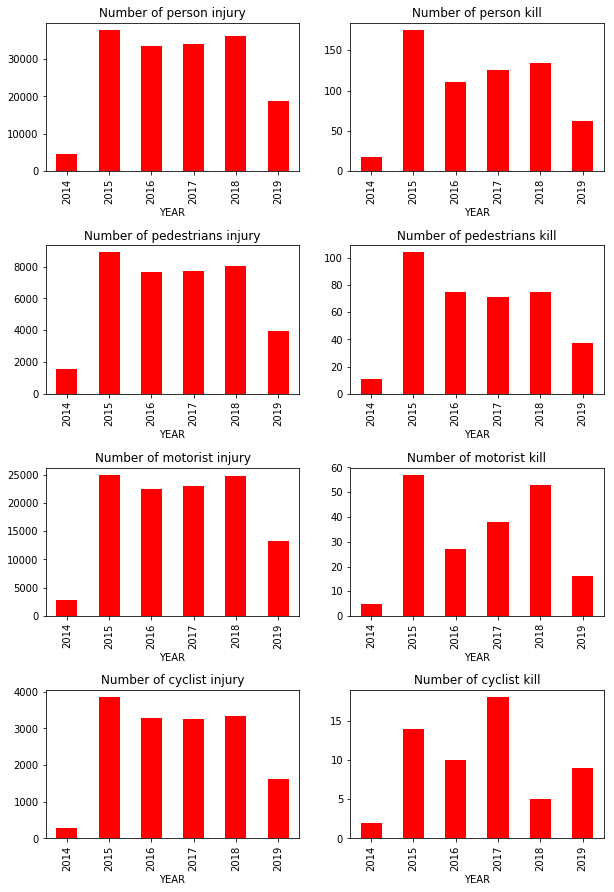

In [14]:
# Preliminary analysis
## Create bar plot by year
## Set subplot size and space
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5)

# Looking at frequency of person injury by year
plt.subplot(4, 2 ,1)
df.groupby('YEAR').NUM_PER_INJUR.sum().plot.bar(color='red').set_title('Number of person injury')

# Looking at frequency of person killed by year
plt.subplot(4, 2, 2)
df.groupby('YEAR').NUM_PER_KILL.sum().plot.bar(color='red').set_title('Number of person kill')

# Looking at frequency of PEDESTRIANS injury by year
plt.subplot(4, 2, 3)
df.groupby('YEAR').NUM_PED_INJUR.sum().plot.bar(color='red').set_title('Number of pedestrians injury')

# Looking at frequency of pedesstrians killed by year
plt.subplot(4, 2, 4)
df.groupby('YEAR').NUM_PED_KILL.sum().plot.bar(color='red').set_title('Number of pedestrians kill')

# Looking at frequency of motorists injury by year
plt.subplot(4, 2, 5)
df.groupby('YEAR').NUM_MOTOR_INJUR.sum().plot.bar(color='red').set_title('Number of motorist injury')

# Looking at frequency of motorists killed by year
plt.subplot(4, 2, 6)
df.groupby('YEAR').NUM_MOTOR_KILL.sum().plot.bar(color='red').set_title('Number of motorist kill')

# Looking at frequency of cyclists injury by year
plt.subplot(4, 2, 7)
df.groupby('YEAR').NUM_CYC_INJUR.sum().plot.bar(color='red').set_title('Number of cyclist injury')

# Looking at frequency of cyclists killed by year
plt.subplot(4, 2, 8)
df.groupby('YEAR').NUM_CYC_KILL.sum().plot.bar(color='red').set_title('Number of cyclist kill')

# Bar Graph - the numbers injured and killed by borough

Text(0.5, 1.0, 'Number of cyclist kill')

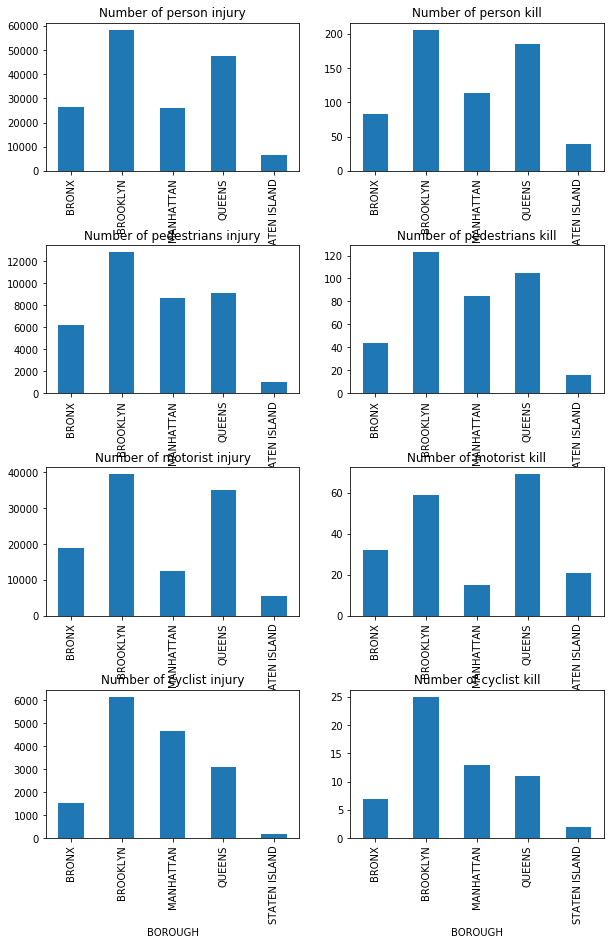

In [15]:
# Preliminary analysis
## Create bar plot by BOROUGH categories

## Set subplot size and space
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5)

# Looking at frequency of person injury by borough
plt.subplot(4, 2 ,1)
df.groupby('BOROUGH').NUM_PER_INJUR.sum().plot.bar().set_title('Number of person injury')

# Looking at frequency of person killed by borough
plt.subplot(4, 2, 2)
df.groupby('BOROUGH').NUM_PER_KILL.sum().plot.bar().set_title('Number of person kill')

# Looking at frequency of PEDESTRIANS injury by borough
plt.subplot(4, 2, 3)
df.groupby('BOROUGH').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians injury')

# Looking at frequency of pedesstrians killed by borough
plt.subplot(4, 2, 4)
df.groupby('BOROUGH').NUM_PED_KILL.sum().plot.bar().set_title('Number of pedestrians kill')

# Looking at frequency of motorists injury by borough
plt.subplot(4, 2, 5)
df.groupby('BOROUGH').NUM_MOTOR_INJUR.sum().plot.bar().set_title('Number of motorist injury')

# Looking at frequency of motorists killed by borough
plt.subplot(4, 2, 6)
df.groupby('BOROUGH').NUM_MOTOR_KILL.sum().plot.bar().set_title('Number of motorist kill')

# Looking at frequency of cyclists injury by borough
plt.subplot(4, 2, 7)
df.groupby('BOROUGH').NUM_CYC_INJUR.sum().plot.bar().set_title('Number of cyclist injury')

# Looking at frequency of cyclists killed by borough
plt.subplot(4, 2, 8)
df.groupby('BOROUGH').NUM_CYC_KILL.sum().plot.bar().set_title('Number of cyclist kill')

In [16]:

# group df by boroughs and apply sum() function 
df_borough = df.groupby('BOROUGH', axis=0).sum()[["NUM_PER_INJUR", "NUM_PER_KILL", "NUM_PED_INJUR", "NUM_PED_KILL", 
                                "NUM_MOTOR_INJUR", "NUM_MOTOR_KILL", "NUM_CYC_INJUR", "NUM_CYC_KILL"]]
df_borough.head()

,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL,NUM_CYC_INJUR,NUM_CYC_KILL
BOROUGH,,,,,,,,
BRONX,26496.0,83.0,6193,44,18772,32,1530,7
BROOKLYN,58419.0,206.0,12829,123,39448,59,6158,25
MANHATTAN,25925.0,113.0,8690,85,12607,15,4648,13
QUEENS,47427.0,185.0,9130,105,35209,69,3093,11
STATEN ISLAND,6617.0,39.0,1001,16,5436,21,179,2


# Pie Chart - the number of pedestrians injured 

A pie chart is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. Let's use a pie chart to explore the proportion (percentage) of number of pedestrians injured grouped by borough for the entire time period from 2014 to 2019. Using the pie chart bellow, the smallest number of pedestrians injured occurred in Staten Island (2.6%) and the highest number of pedestrians injured is in BROOKLYN (33.9%)

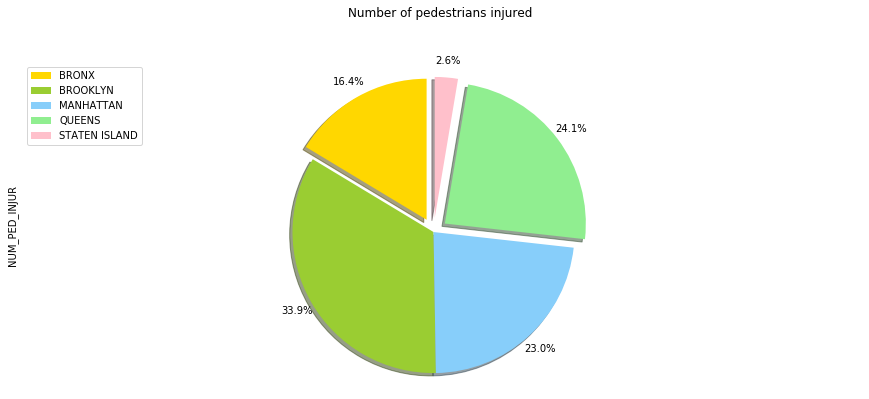

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1] 
df_borough['NUM_PED_INJUR'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Number of pedestrians injured', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=df_borough.index, loc='upper left') 
plt.show()

# Scatter plot of number of motorist versus number of persons injured

Text(0, 0.5, 'number of motorists injured')

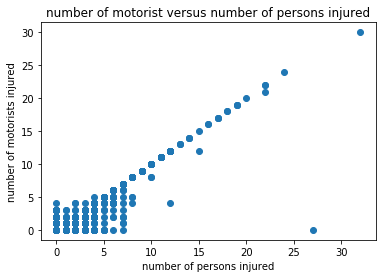

In [18]:
plt.scatter(df["NUM_PER_INJUR"], df["NUM_MOTOR_INJUR"])
plt.title("number of motorist versus number of persons injured")
plt.xlabel("number of persons injured")
plt.ylabel("number of motorists injured")

We can show the distribution of accidents using a scatter plot; the Y-axis indicates number of motorists injured and the X-axis shows number of person injured. A scatter plot is a useful method of comparing the relationship between two variables. The data in a scatter plot is considered to express a trend. As shown in the figure above there seems to be a strong correlation between number of motorists injured and number of persons injured since there is a pattern in the data as the number of motorists injured go by, the number of persons injured show a trend. We can examine the correlation between number of motorists injured and number of persons injured and it is approximately 0.873, a high correlation, the estimate of the correlation coefficient indicates there is a positive relationship between these two variables. There seems to be no correlation between number of pedestrians injured and number of pedestrians killed since there is no pattern in the data as the number of pedestrians injured go by, the number of pedestrians killed doesn't show any trend. We can examine the correlation between number of pedestrians injured and number of pedestrians killed and it is approximately 0.0.00027, the correlation coefficient is almost negligible,  the estimate of the correlation coefficient indicates there is no relationship between these two variables. We can display the scatter plot and notice how the relationship between the number of cyclists injured and number of cyclists killed the same way as performed above.

# Correlation Matrix

In [19]:
df[['NUM_PER_INJUR', 'NUM_PER_KILL', 'NUM_PED_INJUR', 'NUM_PED_KILL', 'NUM_CYC_INJUR', 'NUM_CYC_KILL', 'NUM_MOTOR_INJUR', 'NUM_MOTOR_KILL']].corr()  


,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_CYC_INJUR,NUM_CYC_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL
NUM_PER_INJUR,1.000000,-0.045319,-0.130552,-0.045317,-0.129823,-0.017002,0.872942,-0.011213
NUM_PER_KILL,-0.045319,1.000000,-0.011713,0.788259,-0.020409,0.346812,-0.023313,0.548353
NUM_PED_INJUR,-0.130552,-0.011713,1.000000,0.000270,-0.224594,-0.002640,-0.492941,-0.020584
NUM_PED_KILL,-0.045317,0.788259,0.000270,1.000000,-0.016559,0.075249,-0.030039,0.011563
NUM_CYC_INJUR,-0.129823,-0.020409,-0.224594,-0.016559,1.000000,-0.000274,-0.307898,-0.014282
NUM_CYC_KILL,-0.017002,0.346812,-0.002640,0.075249,-0.000274,1.000000,-0.011852,-0.000808
NUM_MOTOR_INJUR,0.872942,-0.023313,-0.492941,-0.030039,-0.307898,-0.011852,1.000000,0.005447
NUM_MOTOR_KILL,-0.011213,0.548353,-0.020584,0.011563,-0.014282,-0.000808,0.005447,1.000000


As the number of motorist injured goes up, the number of persons injured goes up (the correlation coefficient is positive and it is approximately 0.873): this indicates a positive relationship between these two variables. As the number of persons injured increases the number of persons killed decreases as these two variables have a negative correlation coefficient, but there is a very week correlation of -0.045. Looking at the above output, there seems to be a high correlation between number of pedestrians killed and number of persons killed, and it is approximately 0.788. We can examine the correlation between number of cyclist injured and number of pedestians killed and it's -0.0166. As the number of cyclist injured increases, the number of pedestians killed decreases (the correlation coefficient is negative), the correlation coefficient is almost zero this indicates a the two variables most likely do not affect each other. The correlation between number of motorist killed and number of persons killed is approximately 0.548 which shows that the relationship is positive and moderately strong.  

The dataframe consists of 124868 accidents, which took place through the years 2014 to 2019. In order to reduce computational cost, let's just work with the first 100 accidents in this dataset. Once the dataset is reduced, we will visualize where these accidents took place in the city of New York. We will use the default style and we will initialize the zoom level to 12. Now let's superimpose the locations of the accidents onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the map. While the above bar charts are useful when comparing different categories, it would be nice if we could put these data on a map using their latitude and longitude coordinates. There are several python packages that allows us to plot geospatial data. Here we choose to use folium. There! A New York city borough level motor vehicle collisions map. In addition to the map, we also superimpose the map by creating popups (green dots) that display New York city motor vehicle data. So far we have the motor vehicle collisions map, next we are going to study the neighborhoods using Foursquare APIs. 

In [20]:
# In order to reduce computational cost, let's just work with the first 100 accidents in this dataset.
limit = 100
df_accidents = df.iloc[0:limit, :]
#Now we reduced the data, let's visualize where these accidents took place in the city of New York. 

# latitude and longitude values of New York 
latitude = 40.7128
longitude = -74.0060
NYC_map = folium.Map(location=[latitude, longitude], zoom_start=12) # create map of NYC

# Now let's superimpose the locations of the accidents onto the map. 
accidents = folium.map.FeatureGroup()

# loop through the 100 accidents and add each to the incidents feature group
for lat, lng, in zip(df_accidents.LATITUDE, df_accidents.LONGITUDE):
    accidents.add_child(
        folium.features.CircleMarker([lat, lng], radius=5, color='black', fill=True, fill_color='blue', fill_opacity=0.6
        )
    )

# add incidents to map
NYC_map.add_child(accidents)


# The dataset containing New York city geographical coordinates 
The second dataset used to explore the neighborhoods and cluster them is presented using the following link. The data is structured from jason format to a pandas data frame for ease of manipulation to select the important features necessary for the analysis. The New York city geographical coordinates data will be explored using Foursquare API call, later will be used to grasp the venues information for each neighborhood in Staten Island.
https://geo.nyu.edu/catalog/nyu_2451_34572
 

In [21]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
    
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

    neighborhoods_data = newyork_data['features']

In [22]:

# Tranform the data into a pandas dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
# Take a look at the empty dataframe to confirm that the columns are as intended.
neighborhoods
# Then let's loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
# let's create a dataframe of the Staten Island data.
StatenIsland_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
StatenIsland_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


# Foursquare Credentials and Version

In [23]:
# Foursquare Credentials and Version
CLIENT_ID = '2L42TZQYJ4UULJGSDYSYSGWDSUNE0H0OWZQU3VQVTPIOZI15' 
CLIENT_SECRET = 'LQHQSPCBSQXINPE1RQEUYZGWYKW0WGZPA5DYBMWHUEQZBT4I' 
VERSION = '20180605' 

In [24]:

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# The code to run the above function on each neighborhood and create a new dataframe called StatenIsland_venues
StatenIsland_venues = getNearbyVenues(names=StatenIsland_data['Neighborhood'],
                                   latitudes=StatenIsland_data['Latitude'],
                                   longitudes=StatenIsland_data['Longitude']
                                  )


In [28]:
# Let's check how many venues were returned for each neighborhood
StatenIsland_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,11,11,11,11,11,11
Arden Heights,4,4,4,4,4,4
Arlington,6,6,6,6,6,6
Arrochar,20,20,20,20,20,20
Bay Terrace,8,8,8,8,8,8


# One hot encoding

In [29]:

# one hot encoding
StatenIsland_onehot = pd.get_dummies(StatenIsland_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
StatenIsland_onehot['Neighborhood'] = StatenIsland_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [StatenIsland_onehot.columns[-1]] + list(StatenIsland_onehot.columns[:-1])
StatenIsland_onehot = StatenIsland_onehot[fixed_columns]
StatenIsland_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Laundromat,Laundry Service,Liquor Store,Locksmith,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
StatenIsland_grouped = StatenIsland_onehot.groupby('Neighborhood').mean().reset_index()
StatenIsland_grouped.tail()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Laundromat,Laundry Service,Liquor Store,Locksmith,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
57,Travis,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,0.00,0.0625,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.125,0.000,0.0,0.0,0.000,0.000,0.0,0.0625,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0625,0.0,0.0,0.000000,0.00,0.0,0.125,0.0,0.00,0.0,0.000,0.0,0.0,0.0625,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0625,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0625,0.0,0.0,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000
58,West Brighton,0.0,0.025,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.00,0.05,0.05,0.0000,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.000,0.025,0.0,0.0,0.025,0.025,0.0,0.0250,0.0,0.0,0.0,0.0,0.025,0.0,0.075,0.0000,0.0,0.0,0.000000,0.05,0.0,0.025,0.0,0.00,0.0,0.025,0.0,0.0,0.0000,0.0,0.0,0.025,0.0,0.025,0.0,0.0,0.000000,0.025,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.025,0.0,0.0,0.0,0.0,0.05,0.025,0.0,0.000,0.025,0.0,0.0,0.0,0.025,0.0,0.0,0.00,0.0,0.0,0.025,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0

In [31]:

# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Creating a dataframe that displays the top 10 venues for each neighborhood.

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = StatenIsland_grouped['Neighborhood']

for ind in np.arange(StatenIsland_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(StatenIsland_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,American Restaurant,Train Station,Sports Bar,Liquor Store,Dance Studio,Diner,Restaurant,Discount Store,Filipino Restaurant
1,Arden Heights,Pizza Place,Bus Stop,Coffee Shop,Pharmacy,Fast Food Restaurant,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food
2,Arlington,Bus Stop,Deli / Bodega,American Restaurant,Boat or Ferry,Home Service,Filipino Restaurant,Gas Station,Furniture / Home Store,French Restaurant,Food Truck
3,Arrochar,Bus Stop,Italian Restaurant,Deli / Bodega,Pizza Place,Bagel Shop,Mediterranean Restaurant,Taco Place,Supermarket,Sandwich Place,Outdoors & Recreation
4,Bay Terrace,Supermarket,Train Station,Salon / Barbershop,Donut Shop,Shipping Store,Sushi Restaurant,Insurance Office,Hookah Bar,French Restaurant,Food & Drink Shop


#  Cluster Neighborhoods

In [33]:
# Run k-means to cluster the neighborhoods into five.
# set number of clusters
kclusters = 5
StatenIsland_grouped_clustering = StatenIsland_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(StatenIsland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1], dtype=int32)

# Creating a dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

StatenIsland_merged = StatenIsland_data

# merge StatenIsland_grouped with StatenIsland_data to add latitude/longitude for each neighborhood
StatenIsland_merged = StatenIsland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

StatenIsland_merged.dropna(axis=0, inplace=True)
StatenIsland_merged["Cluster_Labels"] = StatenIsland_merged['Cluster_Labels'].astype('int')
StatenIsland_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,1,Clothing Store,Bar,Pizza Place,Italian Restaurant,Harbor / Marina,Fast Food Restaurant,Plaza,Steakhouse,Scenic Lookout,Coffee Shop
1,Staten Island,New Brighton,40.640615,-74.087017,2,Bus Stop,Park,Bowling Alley,Deli / Bodega,Convenience Store,Construction & Landscaping,Playground,Discount Store,Hookah Bar,Ice Cream Shop
2,Staten Island,Stapleton,40.626928,-74.077902,1,Pizza Place,Restaurant,Sandwich Place,Discount Store,Bank,Mexican Restaurant,Spanish Restaurant,Fast Food Restaurant,Skate Park,New American Restaurant
3,Staten Island,Rosebank,40.615305,-74.069805,1,Italian Restaurant,Grocery Store,Mexican Restaurant,Cajun / Creole Restaurant,Bakery,Filipino Restaurant,Burger Joint,Beach,Sandwich Place,Cosmetics Shop
4,Staten Island,West Brighton,40.631879,-74.107182,1,Coffee Shop,Bank,Pharmacy,Italian Restaurant,Cosmetics Shop,Bar,Music Store,Breakfast Spot,Burger Joint,Bus Stop


# Map displaying the clusters

In [35]:
# Let's get the geographical coordinates of Staten Island.
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(StatenIsland_merged['Latitude'], StatenIsland_merged['Longitude'], StatenIsland_merged['Neighborhood'], StatenIsland_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters


# The five different clusters are shown bellow:
### Cluster 1

In [36]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 0, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Emerson Hill,Sculpture Garden,Zoo Exhibit,Fast Food Restaurant,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop


### Cluster 2

In [37]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 1, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]].head(2)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Bar,Pizza Place,Italian Restaurant,Harbor / Marina,Fast Food Restaurant,Plaza,Steakhouse,Scenic Lookout,Coffee Shop
2,Stapleton,Pizza Place,Restaurant,Sandwich Place,Discount Store,Bank,Mexican Restaurant,Spanish Restaurant,Fast Food Restaurant,Skate Park,New American Restaurant


### Cluster 3

In [38]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 2, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]].head(2)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Brighton,Bus Stop,Park,Bowling Alley,Deli / Bodega,Convenience Store,Construction & Landscaping,Playground,Discount Store,Hookah Bar,Ice Cream Shop
6,Todt Hill,Park,Zoo Exhibit,German Restaurant,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop


### Cluster 4

In [39]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 3, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Port Ivory,Bar,Zoo Exhibit,Filipino Restaurant,Gastropub,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food


### Cluster 5

In [40]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 4, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Graniteville,Supermarket,German Restaurant,Gastropub,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop


## 5. Discussion and Conclusion
In this study we compared the motor vehicle collisions data of New York city by borough category. The objective of this project was to select one borough among five boroughs and to use foursquare API to search for the most common venues for each neighborhood based on a given borough. There are two datasets used for this study, the first one is about the motor vehicle collisions data of New York city and the second dataset used to explore the neighborhoods and cluster them is obtained from the website. In order to address the objective of the study, we have considered descriptive statistics as well as graphical displays such as bar graph, pie charts, scatter plots and using maps. As we have seen from the graphs in the exploratory data analysis, Staten Island has the lowest number of injuries and deaths. To undertake clustering we used K-means algorithm with a pre-specified number of five cluster groups. To visualize the different clusters, the data is color coded with different colors for each cluster group and Folium library is used to render the map. The ten most common venues for each neighborhood in Staten Island are presented. Once the borough with the lowest accident is chosen, the insurance company can choose any neighborhood based on the interest of the availabe clustered venues. 

Based on the analysis described in this report we can conclude that there is a difference in the the number of accidents between the borough categories and Staten Island is the one chosen due to the lowest number of injuries and deaths. This analysis helps the insurance company get a better understanding of the neighborhoods with respect to the most common venues. The choice of venues depend on the interest of the insurance company what they want to select a neighborhood. For instance, if they would like a neighborhood with restaurants, bus stops, rental car locations, hotels, stores, history museum and electronics stores definately cluster four would be the one chosen. If the most common venues the insurer wants are banks, sports clubs, pharmacy, park, beach and IT services cluster one would be the primary choice.